In [7]:
#qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeHanoiV2, FakeHanoi
from qiskit_aer.noise import NoiseModel


In [8]:
#define backend for simulation (IF NEEDED)
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="69dd0a8e90fc66879bc4c330707cd7acf406f659f919d4751794b2fe1c40cc45c4ee341aa791ae11115b1338bfcb158affcc5e99c8aa11c92469605fa72c8a81", set_as_default=True)

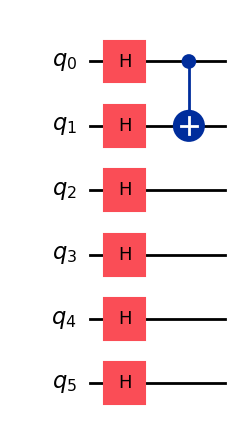

In [9]:
# Create a new circuit with two qubits
qc = QuantumCircuit(6)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [11]:
# Set up six different observables.
#observables_labels = ["ZZ", "ZI", "IZ", "XX", "XI"]
observables_labels = ["ZIIIII","IZIIII"]
#observables_labels = ["IZ"]
observables = [SparsePauliOp(label) for label in observables_labels]

# Construct the Estimator instance we want to use.



#noisy_backend = FakeHanoi()
#self.name+=str(noisy_backend)
#coupling_map = noisy_backend.configuration().coupling_map
#noise_model = NoiseModel.from_backend(noisy_backend)
#self.backend = qiskit_aer.aerprovider.AerProvider()
#estimator = Estimator(
#    backend_options={
#        "method": 'automatic', #"density_matrix","density_matrix",
#        "coupling_map": coupling_map,
#        "noise_model": noise_model,
#        "device": None #device
#    },
#    run_options={"seed": None},  # , "shots": 1024},
#    transpile_options={"seed_transpiler": None}
#)

estimator = Estimator()


#estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

 
observables = [
    observable.apply_layout(qc.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(qc, observables)])
 
# This is the result of the entire submission.  We submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
pub_result = job.result()[0]

print(f"  > Observables: {observables_labels}")
print(f"  > Expectation value: {job_result[0].data.evs}")
print(f"  > Metadata: {job_result[0].metadata}")

  > Observables: ['ZIIIII', 'IZIIII']
  > Expectation value: [0. 0.]
  > Metadata: {'target_precision': 0.0, 'simulator_metadata': {'time_taken_parameter_binding': 8.273e-06, 'time_taken_execute': 8.8143e-05, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 15588, 'parallel_experiments': 1}}
